In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree 

In [2]:
# вводим данные
data_dict = {
    'city_name': ['Новосибирск', 'Самара', 'Ярославль', 'Красноярск', 'Казань', 'Екатеринбург'],
    'is_millionare_city': [1, 1, 0, 1, 1, 1],
    'is_on_volga': [0, 1, 1, 0, 1, 0],
    'is_not_far_from_moscow': [0, 1, 1, 0, 1, 1],
    'is_wch_city': [0, 1, 0, 0, 1, 1]
}

In [3]:
# перегоняем их в pd
data = pd.DataFrame().from_dict(data_dict)
data

,city_name,is_millionare_city,is_on_volga,is_not_far_from_moscow,is_wch_city
0,Новосибирск,1,0,0,0
1,Самара,1,1,1,1
2,Ярославль,0,1,1,0
3,Красноярск,1,0,0,0
4,Казань,1,1,1,1
5,Екатеринбург,1,0,1,1


In [4]:
# обучаем модель
features = data.drop(['city_name', 'is_wch_city'], axis=1)
target = data['is_wch_city']
model = DecisionTreeClassifier()
model.fit(features, target)

DecisionTreeClassifier()

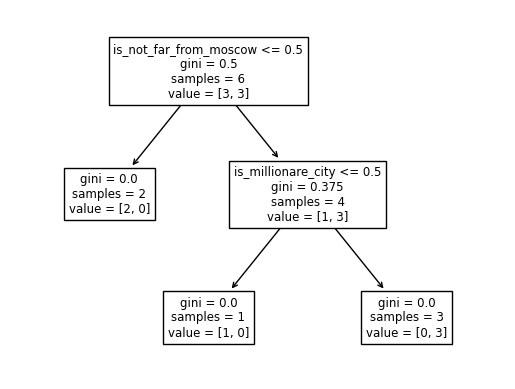

In [5]:
# выводим дерево
plot_tree(model, feature_names=features.columns);

In [ ]:
# рассчитываем важность признаков
pd.DataFrame(
    zip(
        features.columns, 
        model.feature_importances_
    ), 
    columns=['names', 'importances']
).sort_values(by='importances', ascending=False)

In [23]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [34]:
features = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])\
    [['LSTAT', 'RM', 'PTRATIO', 'INDUS']]
features.head()

/home/amelchukova/env_o3_l2r_pipelines/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

,LSTAT,RM,PTRATIO,INDUS
0,4.98,6.575,15.3,2.31
1,9.14,6.421,17.8,7.07
2,4.03,7.185,17.8,7.07
3,2.94,6.998,18.7,2.18
4,5.33,7.147,18.7,2.18


/home/amelchukova/env_o3_l2r_pipelines/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

<AxesSubplot:>

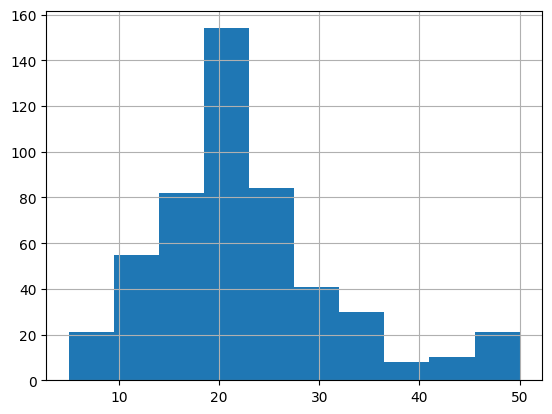

In [35]:
target = pd.Series(load_boston()['target'])
target.hist()

In [140]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=23
)

In [141]:
scaler = StandardScaler()
features_train_sc = scaler.fit_transform(features_train)
features_test_sc = scaler.transform(features_test)

In [142]:
linreg = LinearRegression()
linreg.fit(features_train_sc, target_train)
print(mean_squared_error(target_train, linreg.predict(features_train_sc), squared = False))
print(mean_squared_error(target_test, linreg.predict(features_test_sc), squared = False))

5.157830026944054
5.345053102154326


In [143]:
linreg.coef_

array([-4.32695605,  3.06227079, -1.9656438 ,  0.08858079])

In [149]:
ridgereg = Ridge(alpha=100)
ridgereg.fit(features_train_sc, target_train)
print(mean_squared_error(target_train, ridgereg.predict(features_train_sc), squared = False))
print(mean_squared_error(target_test, ridgereg.predict(features_test_sc), squared = False))

5.274237376831771
5.308622521477597


In [150]:
ridgereg.coef_

array([-3.30719444,  2.74236498, -1.72654906, -0.56048351])

In [154]:
lassoreg = Lasso(alpha=0.5)
lassoreg.fit(features_train_sc, target_train)
print(mean_squared_error(target_train, lassoreg.predict(features_train_sc), squared = False))
print(mean_squared_error(target_test, lassoreg.predict(features_test_sc), squared = False))

5.196705423979943
5.310461288409076


In [155]:
lassoreg.coef_

array([-4.04872874,  2.82674037, -1.62155921, -0.        ])

In [156]:
elasticnetreg = ElasticNet(alpha=0.2)
elasticnetreg.fit(features_train_sc, target_train)
print(mean_squared_error(target_train, elasticnetreg.predict(features_train_sc), squared = False))
print(mean_squared_error(target_test, elasticnetreg.predict(features_test_sc), squared = False))

5.187433706222215
5.297763084762416


In [157]:
elasticnetreg.coef_

array([-3.82489077,  2.92153808, -1.81379092, -0.19517597])